## UniDays Brand Scraper for Different Countries

A quick tool to scrape a distinct list of brands on the UNiDAYS website, for each country/language specific site.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import requests
import bs4

In [2]:
input_dict = {
    'France': ('FR', 'fr'),
    'Germany': ('DE', 'de'),
    'Austria':('AT', 'de'),
    'Switzerland':('CH', 'de'),
    'Belgium':('BE', 'fr'),
    'US':('US', 'en'),
    'Australia':('AU', 'en'),
    'Sweden':('SE', 'sv'),
    'UK':('GB', 'en'),
    'Spain':('ES', 'es'),
    'Italy':('IT', 'it'),
}

In [3]:
def get_distinct_list_of_partners(country_codes_dict):
    
    output_dict = {}
    
    for country in country_codes_dict.keys():
    
        country_code = country_codes_dict[country][0]
        language_code = country_codes_dict[country][1]
    
        URL = f"https://www.myunidays.com/{country_code}/{language_code}-{country_code}/list/all/AtoZ"
        page = requests.get(URL)
        soup = bs4.BeautifulSoup(page.content, "html.parser")
        title_logos = soup.find_all("div", class_="tile__logo")

        brands = set()
        for logo in title_logos:
            image = logo.find("img")
            # print(image)
            # print(image['alt'])
            brands.add(image['alt'])
            
        output_dict[country] = {}
        output_dict[country]['brand_list'] = brands
        output_dict[country]['num_brands'] = len(brands)

    return output_dict

In [4]:
output = get_distinct_list_of_partners(input_dict)

In [5]:
for country in output.keys():
    print(f"{country}: # {output[country]['num_brands']} brands")

France: # 151 brands
Germany: # 199 brands
Austria: # 47 brands
Switzerland: # 28 brands
Belgium: # 23 brands
US: # 217 brands
Australia: # 180 brands
Sweden: # 23 brands
UK: # 372 brands
Spain: # 93 brands
Italy: # 70 brands


In [6]:
temp_df = pd.DataFrame(output).T.reset_index().rename(columns={'index':'country'}).sort_values(by=['num_brands'], ascending=False)

In [7]:
temp_df

,country,brand_list,num_brands
8,UK,"{Camper, Sky, M•A•C Cosmetics, Converse, Dr. J...",372
5,US,"{Glasses.com, barre3 Online, LAMODA, Camper, S...",217
1,Germany,"{Sennheiser, IDEAL OF SWEDEN, Ralph Lauren, Ri...",199
6,Australia,"{Adrenaline, Sennheiser, IDEAL OF SWEDEN, Lovi...",180
0,France,"{LAMODA, Camper, Prime Student, Sennheiser, ID...",151
9,Spain,"{Camper, Hofmann, Rituals, Hypnia Colchón, Con...",93
10,Italy,"{Acer, Camper, PUMA, Intrepid Travel, Samsung,...",70
2,Austria,"{Sennheiser, N26, Rituals, Intrepid Travel, Mi...",47
3,Switzerland,"{Sennheiser, Dell, Mister Spex, Shopbop, Apple...",28
4,Belgium,"{ASICS, Shopbop, Apple Music, Jack & Jones, Un...",23


Text(0, 0.5, '# Distinct Brands')

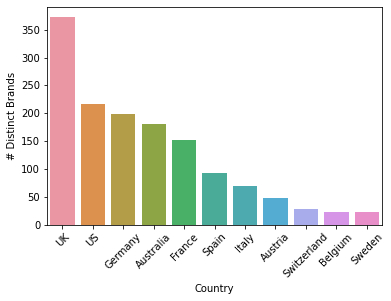

In [10]:
ax = sns.barplot(x='country', y='num_brands', data=temp_df) 
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    
ax.set_xlabel('Country')
ax.set_ylabel('# Distinct Brands')